In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def print_stat(df, name):
    print("=========" + name + "=========")
    num_users = len(df['user'].unique())
    num_items = len(df['item'].unique())
    min_date =  pd.to_datetime(min(df['time']), unit='s')
    max_date = pd.to_datetime(max(df['time']), unit='s')
    num_ratings = len(df)
    sparsity = 1 - 1.0*num_ratings/(num_users*num_items)
    print("First date: " + str(min_date))
    print("Last date: " + str(max_date))
    print("The number of users: " + str(num_users))
    print("The number of items: " + str(num_items))
    print("The number of ratings: " + str(num_ratings))
    print("Average actions of users:  " + str(num_ratings/num_users))
    print("Average actions of items:  " + str(num_ratings/num_items))
    print("The sparsity of the dataset:  " + str(sparsity * 100))

In [3]:
def print_stats(datasets):
    for ds in datasets:
        print_stat(ds['df'], ds['name'])

In [4]:
def make_it_dense(datasets, min_user=10, min_item=10):
    datasets_dense = []
    for ds in datasets:
        df = ds['df']
        print_stat(df, ds['name'])
        count_user_df = df.groupby('user').size().to_frame('counts').reset_index()
        dense_users = count_user_df[count_user_df['counts']>min_user].user.unique()
        count_item_df = df.groupby('item').size().to_frame('counts').reset_index()
        dense_items = count_item_df[count_item_df['counts']>min_item].item.unique()
        df_dense = df[((df['user'].isin(dense_users)) & (df['item'].isin(dense_items)))]
        name_dense = ds['name']+"_dense"
        print_stat(df_dense, name_dense)
        datasets_dense.append({"name": name_dense, "df": df_dense})
        df_dense.to_csv("../data/curated/" + name_dense + ".csv", header=False, index=False)
    return datasets_dense

In [31]:
def print_box(datasets, by):
    grouped_dfs = []
    for ds in datasets:
        df = ds['df']
        grouped_df = df.groupby(by).size().to_frame('counts').reset_index().set_index(by).sort_values('counts', ascending=False)
        grouped_df['dataset'] = ds['name']
        grouped_dfs.append(grouped_df)
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.set_yscale('log')
    ax.set_ylabel(",".join(by) + " frequency (log scaled)")
    pd.concat(grouped_dfs).boxplot(by='dataset', ax=ax, showmeans=True)
    fig.suptitle('')
    ax.set_title(",".join(by) + ' frequency distribution by dataset')
    ax.set_xlabel("datasets")
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
    plt.savefig('../data/consumer/boxplot_' + "_".join(by) + '.png')
    plt.show()

In [6]:
def print_hist(df, datasource):
    df['user'] = df['user'].astype('category')
    df['item'] = df['item'].astype('category')
    user_df = df.groupby('user').agg(count=pd.NamedAgg(column="time", aggfunc="count")).sort_values('count', ascending=False).reset_index()
    item_df = df.groupby('item').agg(count=pd.NamedAgg(column="time", aggfunc="count")).sort_values('count', ascending=False).reset_index()
    user_df.plot(kind='hist', title='User histogram (' + datasource + ')', legend=False)
    item_df.plot(kind='hist', title='Item histogram (' + datasource + ')', legend=False)


In [23]:
b2c_df = pd.read_csv("../data/curated/vx/orderentry.csv", parse_dates=['time'], header=None, names=['user','item', 'time'])
b2b_df = pd.read_csv("../data/curated/koch/orderentry.csv", parse_dates=['time'], header=None, names=['user','item', 'time'])
retailrocket_df = pd.read_csv("../data/curated/retailrocket.csv", parse_dates=['time'], header=None, names=['user','item', 'time'])
yoochoose_df = pd.read_csv("../data/curated/youchoose.csv", parse_dates=['time'], header=None, names=['user','item', 'time'])

datasets = []
datasets.append({"name": "b2c", "df": b2c_df})
datasets.append({"name": "b2b", "df": b2b_df})
datasets.append({"name": "retailrocket", "df": retailrocket_df})
datasets.append({"name": "yoochoose", "df": yoochoose_df})

In [8]:
print_stats(datasets)

=========b2c=========
First date: 2019-01-01 01:03:52
Last date: 2019-12-31 12:57:51
The number of users: 105761
The number of items: 1867
The number of ratings: 180038
Average actions of users:  1.7023099252087253
Average actions of items:  96.4317086234601
The sparsity of the dataset:  99.90882110738035
=========b2b=========
First date: 2019-01-01 08:41:21
Last date: 2019-12-31 11:06:32
The number of users: 7588
The number of items: 27732
The number of ratings: 945811
Average actions of users:  124.64562467053241
Average actions of items:  34.105401702004905
The sparsity of the dataset:  99.55053503292034
=========retailrocket=========
First date: 2015-05-03 03:27:21
Last date: 2015-09-18 02:43:12
The number of users: 11719
The number of items: 12025
The number of ratings: 22457
Average actions of users:  1.9162897858179027
Average actions of items:  1.8675259875259875
The sparsity of the dataset:  99.98406411820525
=========yoochoose=========
First date: 2014-04-01 03:05:31
Last dat

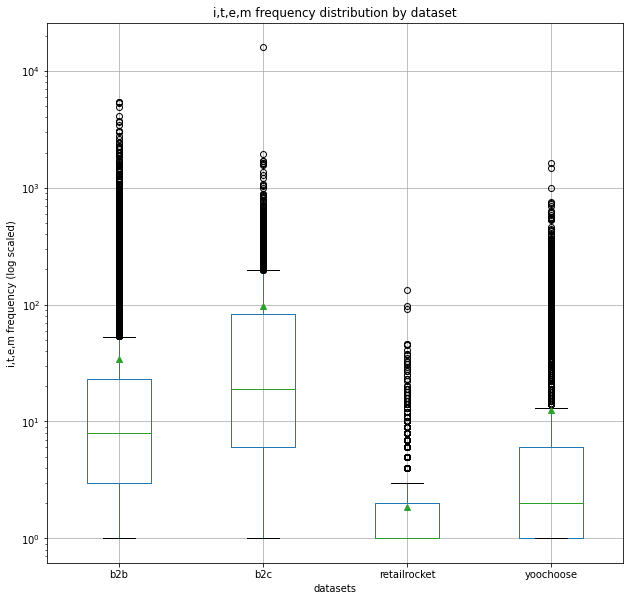

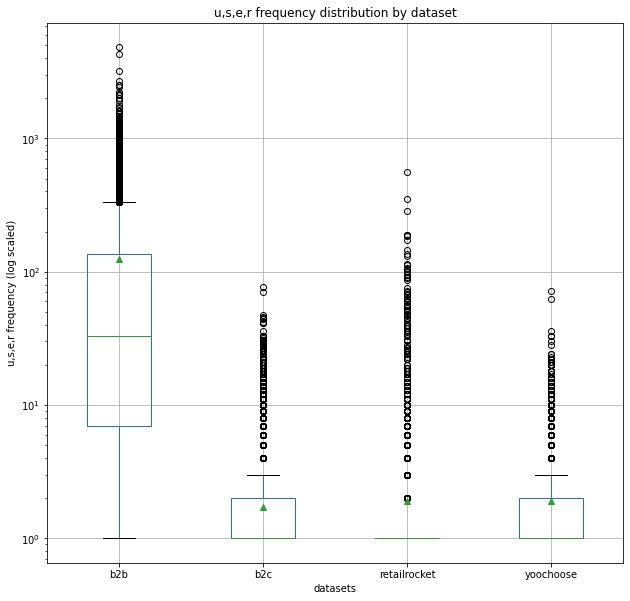

In [9]:
print_box(datasets, 'item')
print_box(datasets, 'user')

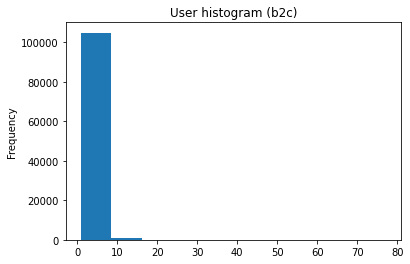

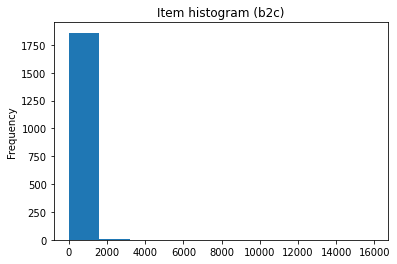

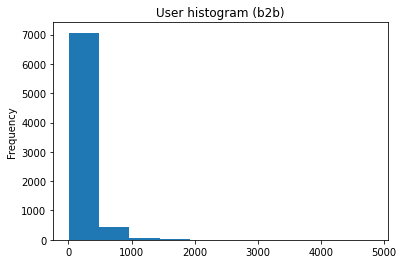

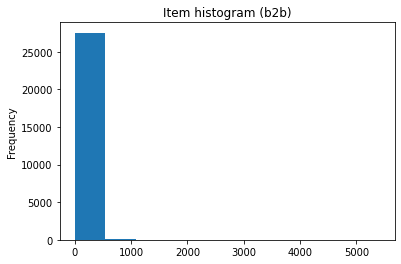

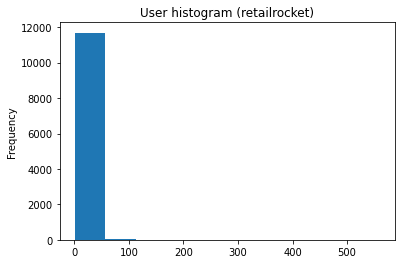

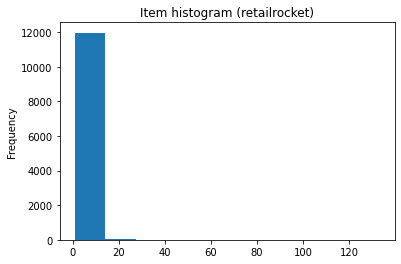

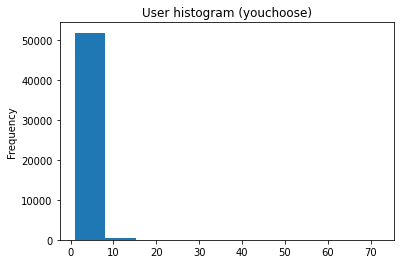

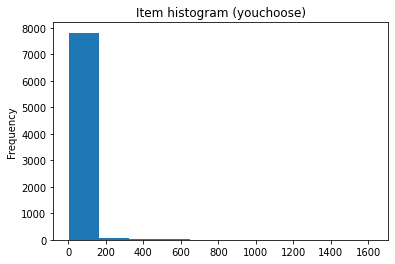

In [10]:
print_hist(b2c_df, 'b2c')
print_hist(b2b_df, 'b2b')
print_hist(retailrocket_df, 'retailrocket')
print_hist(yoochoose_df, 'youchoose')

In [27]:
dense_datasets = make_it_dense(datasets, 5, 5)
#print(dense_datasets)

=========b2c=========
First date: 2019-01-01 01:03:52
Last date: 2019-12-31 12:57:51
The number of users: 105761
The number of items: 1867
The number of ratings: 180038
Average actions of users:  1.7023099252087253
Average actions of items:  96.4317086234601
The sparsity of the dataset:  99.90882110738035
=========b2c_dense=========
First date: 2019-01-01 02:07:30
Last date: 2019-12-31 10:09:05
The number of users: 2848
The number of items: 990
The number of ratings: 24480
Average actions of users:  8.595505617977528
Average actions of items:  24.727272727272727
The sparsity of the dataset:  99.1317671092952
=========b2b=========
First date: 2019-01-01 08:41:21
Last date: 2019-12-31 11:06:32
The number of users: 7588
The number of items: 27732
The number of ratings: 945811
Average actions of users:  124.64562467053241
Average actions of items:  34.105401702004905
The sparsity of the dataset:  99.55053503292034
=========b2b_dense=========
First date: 2019-01-01 08:41:21
Last date: 2019-

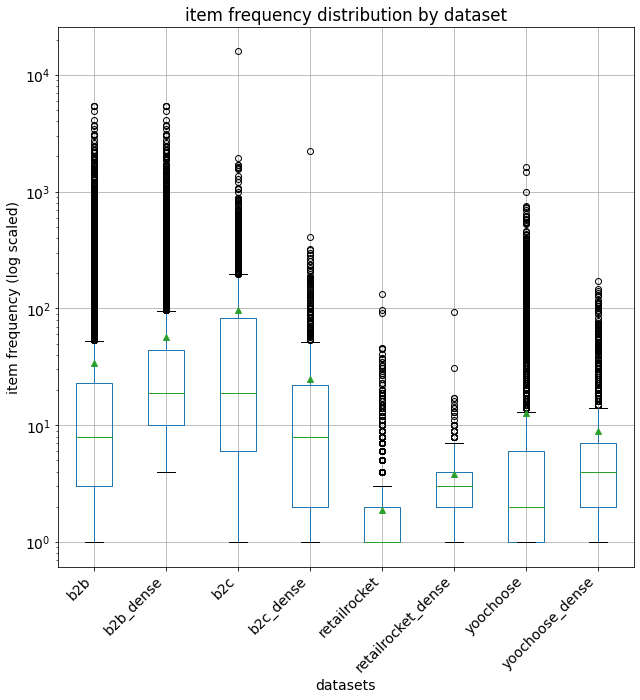

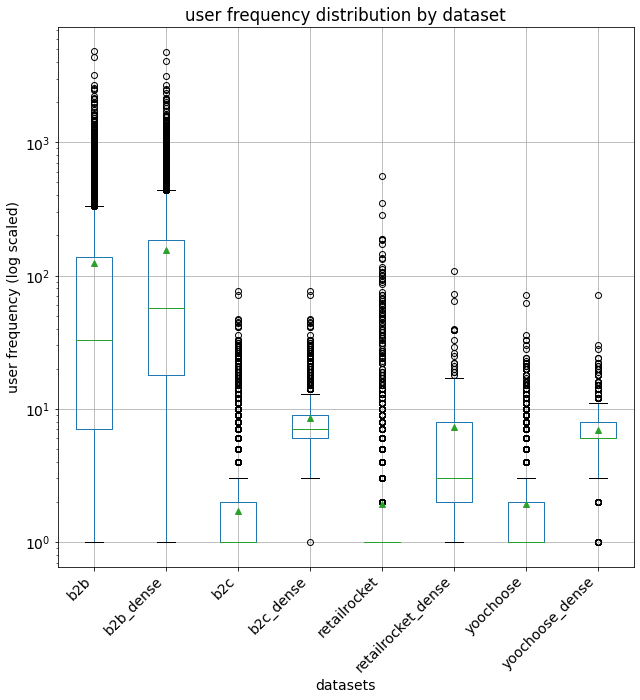

In [32]:
print_box(datasets + dense_datasets, ['item'])
print_box(datasets + dense_datasets, ['user'])

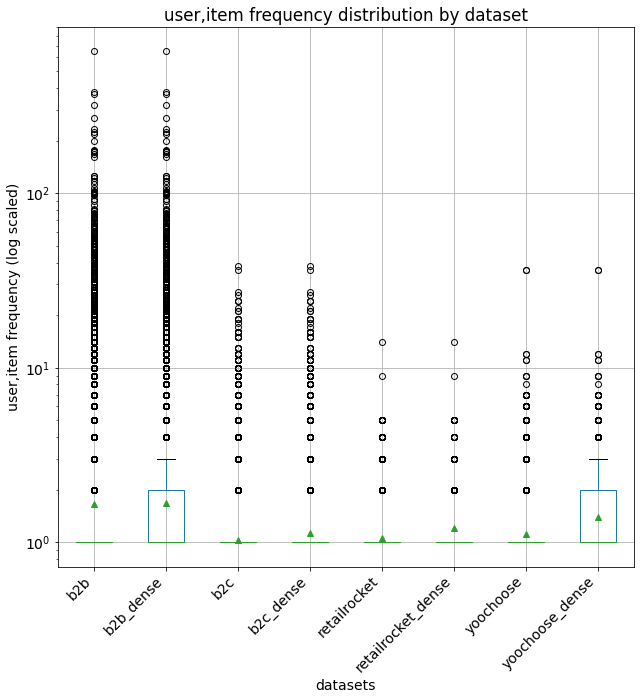

In [33]:
print_box(datasets + dense_datasets, ['user','item'])